In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import mpmath as mp
import numpy as np
import scipy as sc
from mpl_toolkits import mplot3d
from array import *
from scipy.integrate import *
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from numpy.random import normal
from numpy import hstack

from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib.ticker import FuncFormatter, MultipleLocator

!pip install pymannkendall
import pymannkendall as mk

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100
# plt.rcParams['figure.figsize'] = [10.24, 7.6]
# plt.rcParams['figure.dpi'] = 300

In [2]:
naon = pd.read_csv("naon.csv")
naop = pd.read_csv("naop.csv")

In [3]:
naon


,Unnamed: 0,Unnamed: 0.1,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,...,yymo,emp_pcp,emp_twl,emp_sflow,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity
0,0,5,6,01-06-1965,1965,1,6,1.610,6.53,60.30,...,196501,0.771707,0.933508,0.598240,0.679268,196501,-0.12,1.750,15.40,1.705215
1,1,51,52,2/21/1965,1965,2,21,1.550,1.73,9.43,...,196502,0.589570,0.896086,0.039844,0.661609,196502,-1.55,1.690,23.10,1.485656
2,2,51,52,2/21/1965,1965,2,21,1.550,1.73,9.43,...,196502,0.589570,0.896086,0.039844,0.661609,196502,-1.55,1.680,23.10,1.485656
3,5,369,370,01-05-1966,1966,1,5,1.680,7.09,19.30,...,196601,0.786625,0.961431,0.198075,0.938034,196601,-1.74,1.680,25.00,1.748056
4,6,374,375,01-10-1966,1966,1,10,1.970,13.40,17.20,...,196601,0.877980,0.997641,0.166964,0.987250,196601,-1.74,1.690,66.40,1.875622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,747,15339,15340,01-09-2011,2011,1,9,1.556,10.90,55.10,...,201101,0.848591,0.897361,0.564134,0.916741,201101,-0.88,1.715,31.70,1.745952
417,748,15341,15342,01-11-2011,2011,1,11,1.664,0.75,57.80,...,201101,0.503188,0.955374,0.581283,0.989609,201101,-0.88,1.664,2.18,1.458562
418,749,15350,15351,1/20/2011,2011,1,20,1.862,1.72,22.00,...,201101,0.582685,0.992732,0.237792,0.934910,201101,-0.88,1.862,22.80,1.575418
419,750,15353,15354,1/23/2011,2011,1,23,1.649,51.70,21.10,...,201101,0.994326,0.947660,0.224468,0.374538,201101,-0.88,1.759,11.80,1.941986


In [4]:
naop

,Unnamed: 0,Unnamed: 0.1,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,...,yymo,emp_pcp,emp_twl,emp_sflow,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity
0,3,346,347,12/13/1965,1965,12,13,1.540,2.76,32.3,...,196512,0.646436,0.887926,0.364656,0.829275,196512,1.37,1.670,11.90,1.534362
1,4,360,361,12/27/1965,1965,12,27,1.660,2.41,17.4,...,196512,0.632475,0.954737,0.170215,0.881295,196512,1.37,1.660,5.19,1.587212
2,12,714,715,12/16/1966,1966,12,16,1.510,1.73,30.6,...,196612,0.589570,0.861724,0.347061,0.827744,196612,0.72,1.660,43.80,1.451294
3,15,764,765,02-04-1967,1967,2,4,1.660,15.40,14.9,...,196702,0.897233,0.954737,0.128140,0.924264,196702,0.19,1.660,49.40,1.851970
4,16,785,786,2/25/1967,1967,2,25,1.590,8.30,12.1,...,196702,0.809129,0.921841,0.082111,0.646309,196702,0.19,1.750,13.10,1.730970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,778,15630,15631,10/31/2011,2011,10,31,1.715,22.70,60.2,...,201110,0.942751,0.970419,0.597412,0.979026,201110,0.39,1.715,33.70,1.913171
358,779,15649,15650,11/25/2011,2011,11,25,1.598,0.35,55.2,...,201111,0.424646,0.922734,0.565090,0.631837,201111,1.36,1.682,50.10,1.347380
359,780,15653,15654,11/29/2011,2011,11,29,1.676,2.99,45.7,...,201111,0.660143,0.958753,0.492477,0.838391,201111,1.36,1.670,6.26,1.618896
360,781,15653,15654,11/29/2011,2011,11,29,1.676,2.99,45.7,...,201111,0.660143,0.958753,0.492477,0.838391,201111,1.36,1.676,6.26,1.618896


In [23]:
# naon.groupby(naon.yymo).(['emp_pcp', 'emp_twl', 'emp_sflow', 'emp_skewv']).mean()
naon_avg=naon.groupby(naon.yymo).mean()
naon_avg

,Unnamed: 0,Unnamed: 0.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,skewsurge,emp_pcp,emp_twl,emp_sflow,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity
yymo,,,,,,,,,,,,,,,,,,,
196501,0.0,5.000000,6.000000,1965.0,1.0,6.000000,1.610000,6.530000,60.300000,0.109000,0.771707,0.933508,0.598240,0.679268,196501.0,-0.12,1.750000,15.400000,1.705215
196502,1.5,51.000000,52.000000,1965.0,2.0,21.000000,1.550000,1.730000,9.430000,0.102000,0.589570,0.896086,0.039844,0.661609,196502.0,-1.55,1.685000,23.100000,1.485656
196601,6.0,372.333333,373.333333,1966.0,1.0,8.333333,1.873333,11.296667,17.900000,0.391333,0.847529,0.985571,0.177334,0.970844,196601.0,-1.74,1.780000,52.600000,1.833100
196602,9.5,407.750000,408.750000,1966.0,2.0,12.750000,1.687500,6.350000,23.425000,0.242500,0.655824,0.959805,0.251195,0.871797,196602.0,-1.39,1.790000,10.015000,1.615629
196701,13.5,759.000000,760.000000,1967.0,1.0,30.000000,1.690000,10.200000,17.600000,0.240000,0.838965,0.965256,0.173276,0.892898,196701.0,-0.89,1.680000,14.700000,1.804220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201009,723.5,15227.250000,15228.250000,2010.0,9.0,16.250000,1.672000,7.592500,46.375000,0.384500,0.590622,0.947373,0.498518,0.909983,201009.0,-0.79,1.730750,50.900000,1.537996
201010,728.5,15255.833333,15256.833333,2010.0,10.0,14.833333,1.719333,1.208333,116.466667,0.290333,0.519062,0.970781,0.783172,0.925231,201010.0,-0.93,1.773000,3.790000,1.489842
201011,734.5,15294.166667,15295.166667,2010.0,11.0,24.166667,1.742000,1.676667,37.133333,0.307500,0.556356,0.940573,0.412374,0.922659,201011.0,-1.62,1.778667,6.500000,1.496929


In [24]:
naop_avg=naop.groupby(naop.yymo).mean()
naop_avg

,Unnamed: 0,Unnamed: 0.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,skewsurge,emp_pcp,emp_twl,emp_sflow,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity
yymo,,,,,,,,,,,,,,,,,,,
196512,3.5,353.000000,354.000000,1965.0,12.0,20.000000,1.600000,2.585,24.850000,0.20850,0.639456,0.921331,0.267436,0.855285,196512.0,1.37,1.6650,8.545000,1.560787
196612,12.0,714.000000,715.000000,1966.0,12.0,16.000000,1.510000,1.730,30.600000,0.18700,0.589570,0.861724,0.347061,0.827744,196612.0,0.72,1.6600,43.800000,1.451294
196702,15.5,774.500000,775.500000,1967.0,2.0,14.500000,1.625000,11.850,13.500000,0.18350,0.853181,0.938289,0.105126,0.785286,196702.0,0.19,1.7050,31.250000,1.791470
196710,18.0,1007.666667,1008.666667,1967.0,10.0,5.666667,1.736667,0.270,53.700000,0.17300,0.366463,0.958732,0.550300,0.763228,196710.0,0.07,1.7600,7.130000,1.325194
196801,22.5,1108.250000,1109.250000,1968.0,1.0,14.250000,1.597500,4.205,21.675000,0.22025,0.533198,0.901903,0.229201,0.849245,196801.0,0.13,1.7225,8.990000,1.435101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201104,771.5,15423.000000,15424.000000,2011.0,4.0,3.000000,1.669000,4.450,24.700000,0.53200,0.717009,0.955948,0.273811,0.995665,201104.0,2.48,1.6995,24.900000,1.672957
201109,773.0,15582.000000,15583.000000,2011.0,9.0,11.000000,1.315000,0.000,88.400000,0.03900,0.236580,0.572166,0.724085,0.487377,201109.0,0.54,1.7300,0.300000,0.808747
201110,776.0,15628.000000,15629.000000,2011.0,10.0,29.000000,1.814800,10.400,80.740000,0.34520,0.739844,0.982889,0.683476,0.938812,201110.0,0.39,1.8164,40.820000,1.722734


In [59]:
naon_avg['nint_twl_pcp']=   naon_avg['emp_pcp'] + naon_avg['emp_twl']          # 1) TWL and pcp
naon_avg['nint_twl_sflow']= naon_avg['emp_twl'] + naon_avg['emp_sflow']          # 2) TWL and streamflow 
naon_avg['nint_sflow_ssurge']=naon_avg['emp_sflow'] + naon_avg['emp_skewv']         # 3) sflow and skewsurge
naon_avg['nint_pcp_ssurg']= naon_avg['emp_pcp'] + naon_avg['emp_skewv']         #4) pcp and skewsurge

In [60]:
naop_avg['pint_twl_pcp']=   naop_avg['emp_pcp'] + naop_avg['emp_twl']           # 1) TWL and pcp
naop_avg['pint_twl_sflow']= naop_avg['emp_twl'] + naop_avg['emp_sflow']          # 2) TWL and streamflow 
naop_avg['pint_sflow_ssurge']=naop_avg['emp_sflow'] + naop_avg['emp_skewv']             # 3) TWL and skewsurge
naop_avg['pint_pcp_ssurg']= naop_avg['emp_pcp'] + naop_avg['emp_skewv']            #4) pcp and skewsurge

In [61]:
naon_avg

,Unnamed: 0,Unnamed: 0.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,skewsurge,...,nao_yymmo,nao_index,twl_max,prec_max,intensity,nint_twl_pcp,nint_twl_sflow,nint_twl_ssurge,nint_pcp_ssurg,nint_sflow_ssurge
yymo,,,,,,,,,,,,,,,,,,,,,
196501,0.0,5.000000,6.000000,1965.0,1.0,6.000000,1.610000,6.530000,60.300000,0.109000,...,196501.0,-0.12,1.750000,15.400000,1.705215,1.705215,1.531748,1.612776,1.450975,1.277509
196502,1.5,51.000000,52.000000,1965.0,2.0,21.000000,1.550000,1.730000,9.430000,0.102000,...,196502.0,-1.55,1.685000,23.100000,1.485656,1.485656,0.935930,1.557695,1.251179,0.701454
196601,6.0,372.333333,373.333333,1966.0,1.0,8.333333,1.873333,11.296667,17.900000,0.391333,...,196601.0,-1.74,1.780000,52.600000,1.833100,1.833100,1.162905,1.956415,1.818373,1.148179
196602,9.5,407.750000,408.750000,1966.0,2.0,12.750000,1.687500,6.350000,23.425000,0.242500,...,196602.0,-1.39,1.790000,10.015000,1.615629,1.615629,1.211000,1.831601,1.527620,1.122992
196701,13.5,759.000000,760.000000,1967.0,1.0,30.000000,1.690000,10.200000,17.600000,0.240000,...,196701.0,-0.89,1.680000,14.700000,1.804220,1.804220,1.138531,1.858154,1.731863,1.066174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201009,723.5,15227.250000,15228.250000,2010.0,9.0,16.250000,1.672000,7.592500,46.375000,0.384500,...,201009.0,-0.79,1.730750,50.900000,1.537996,1.537996,1.445891,1.857357,1.500606,1.408501
201010,728.5,15255.833333,15256.833333,2010.0,10.0,14.833333,1.719333,1.208333,116.466667,0.290333,...,201010.0,-0.93,1.773000,3.790000,1.489842,1.489842,1.753953,1.896011,1.444292,1.708402
201011,734.5,15294.166667,15295.166667,2010.0,11.0,24.166667,1.742000,1.676667,37.133333,0.307500,...,201011.0,-1.62,1.778667,6.500000,1.496929,1.496929,1.352947,1.863233,1.479015,1.335033


In [74]:
naop_avg

,Unnamed: 0,Unnamed: 0.1,sno,yy,mo,dd,total_wl,precipitation,streamflow,skewsurge,...,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_twl_ssurge,pint_pcp_ssurg,pint_sflow_ssurge
yymo,,,,,,,,,,,,,,,,,,,,,
196512,3.5,353.000000,354.000000,1965.0,12.0,20.000000,1.600000,2.585,24.850000,0.20850,...,196512.0,1.37,1.6650,8.545000,1.560787,1.560787,1.188767,1.776616,1.494741,1.122721
196612,12.0,714.000000,715.000000,1966.0,12.0,16.000000,1.510000,1.730,30.600000,0.18700,...,196612.0,0.72,1.6600,43.800000,1.451294,1.451294,1.208785,1.689468,1.417315,1.174806
196702,15.5,774.500000,775.500000,1967.0,2.0,14.500000,1.625000,11.850,13.500000,0.18350,...,196702.0,0.19,1.7050,31.250000,1.791470,1.791470,1.043415,1.723575,1.638467,0.890412
196710,18.0,1007.666667,1008.666667,1967.0,10.0,5.666667,1.736667,0.270,53.700000,0.17300,...,196710.0,0.07,1.7600,7.130000,1.325194,1.325194,1.509031,1.721960,1.129691,1.313528
196801,22.5,1108.250000,1109.250000,1968.0,1.0,14.250000,1.597500,4.205,21.675000,0.22025,...,196801.0,0.13,1.7225,8.990000,1.435101,1.435101,1.131104,1.751148,1.382443,1.078446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201104,771.5,15423.000000,15424.000000,2011.0,4.0,3.000000,1.669000,4.450,24.700000,0.53200,...,201104.0,2.48,1.6995,24.900000,1.672957,1.672957,1.229759,1.951613,1.712674,1.269476
201109,773.0,15582.000000,15583.000000,2011.0,9.0,11.000000,1.315000,0.000,88.400000,0.03900,...,201109.0,0.54,1.7300,0.300000,0.808747,0.808747,1.296251,1.059544,0.723958,1.211462
201110,776.0,15628.000000,15629.000000,2011.0,10.0,29.000000,1.814800,10.400,80.740000,0.34520,...,201110.0,0.39,1.8164,40.820000,1.722734,1.722734,1.666365,1.921701,1.678656,1.622287


# 1) TWL and pcp (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.0939282271831241, z=-1.6750306041331182, Tau=-0.1063499456606117, s=-685.0, var_s=166750.33333333334, slope=-0.001028517975000002, intercept=1.603187288825)


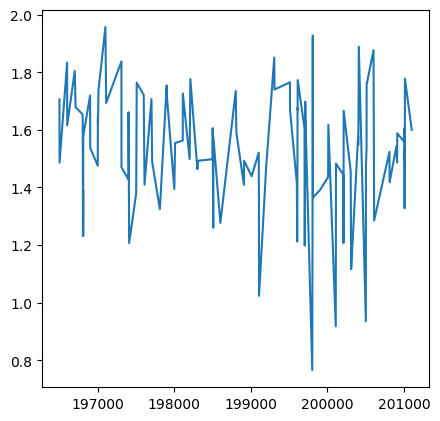

In [49]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_twl_pcp)
result = mk.original_test(naon_avg.nint_twl_pcp)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg, nint_pcp_ssurg

# 2) TWL and streamflow (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.23206707577040753, z=1.1950510742938036, Tau=0.0759198882161155, s=489.0, var_s=166750.33333333334, slope=0.0010112815888888892, intercept=1.3568368349277777)


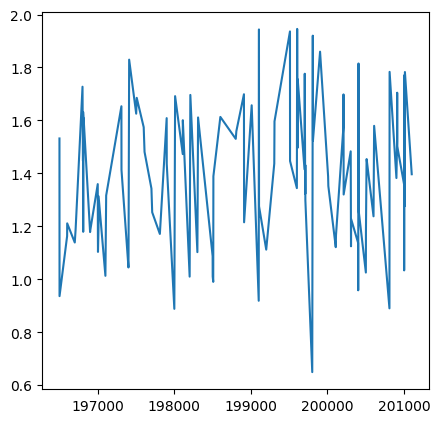

In [39]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_twl_sflow)
result = mk.original_test(naon_avg.nint_twl_sflow)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 3) sflow and skewsurge (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.058686896103048225, z=1.8905316175303615, Tau=0.12001242043160999, s=773.0, var_s=166750.33333333334, slope=0.0017531556666666632, intercept=1.2256311370833335)


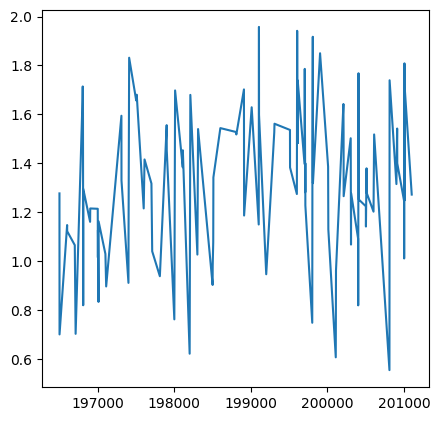

In [67]:
plt.plot(naon_avg.nao_yymmo, naon_avg.nint_sflow_ssurge)
result = mk.original_test(naon_avg.nint_sflow_ssurge)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 4) pcp and skewsurge (intensity) - neagtive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.7115454818333644, z=-0.3697812567772731, Tau=-0.02359882005899705, s=-152.0, var_s=166749.33333333334, slope=-0.0002538091468750059, intercept=1.4720333827151046)


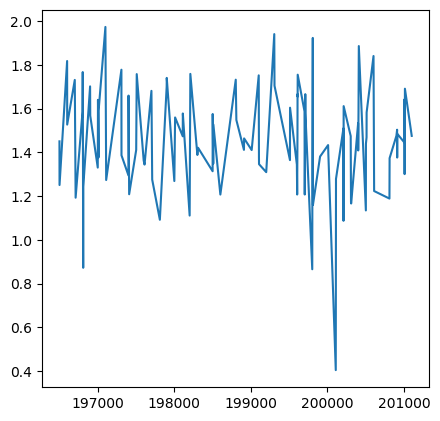

In [44]:
plt.plot(naon_avg.nao_yymmo,naon_avg.nint_pcp_ssurg)
result = mk.original_test(naon_avg.nint_pcp_ssurg)
print(result) #nint_twl_pcp	nint_twl_sflow	nint_twl_ssurge	nint_pcp_ssurg

# 1)TWL and pcp (intensity) - positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.7913020601819951, z=-0.26462019633042094, Tau=-0.016129032258064516, s=-125.0, var_s=219582.33333333334, slope=-0.00013607676519642231, intercept=1.4848743470421781)


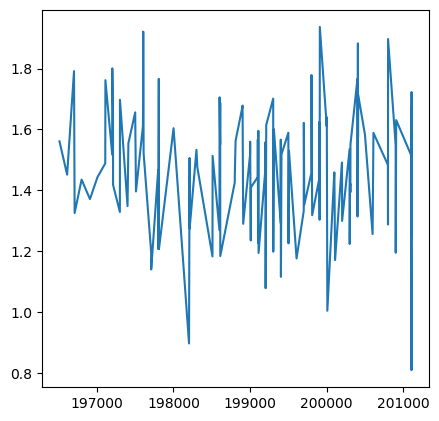

In [45]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_twl_pcp)
result = mk.original_test(naop_avg.pint_twl_pcp)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 2)TWL and streamflow (intensity)- positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.1546210057530255, z=1.4233973310531869, Tau=0.08619354838709678, s=668.0, var_s=219583.33333333334, slope=0.0008805686376699485, intercept=1.2373848541311299)


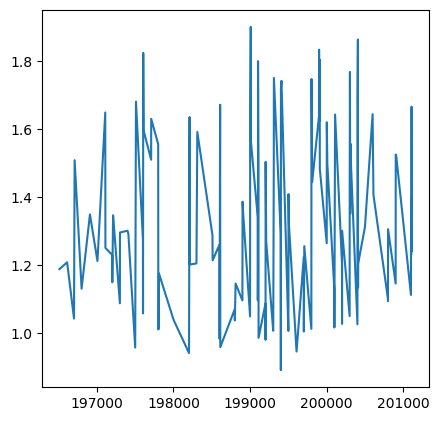

In [46]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_twl_sflow)
result = mk.original_test(naop_avg.pint_twl_sflow)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 3) sflow and skewsurge (intensity) - positive phase

Mann_Kendall_Test(trend='increasing', h=True, p=0.025743440870055645, z=2.230060286282729, Tau=0.13496774193548386, s=1046.0, var_s=219583.33333333334, slope=0.0015462861811068223, intercept=1.0488452897713767)


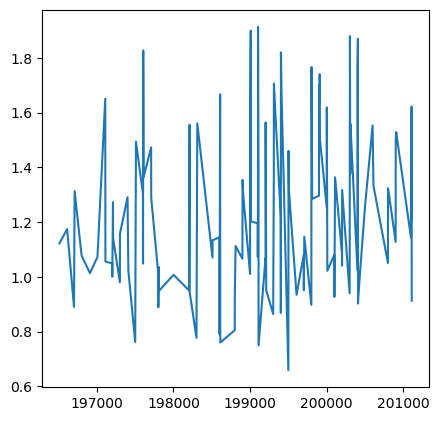

In [69]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_sflow_ssurge)
result = mk.original_test(naop_avg.pint_sflow_ssurge)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 4) pcp and skewsurge (intensity) - positive phase

Mann_Kendall_Test(trend='no trend', h=False, p=0.26255816156351575, z=1.1203652155965864, Tau=0.06787096774193549, s=526.0, var_s=219583.33333333334, slope=0.0007090083744357181, intercept=1.3384844235349855)


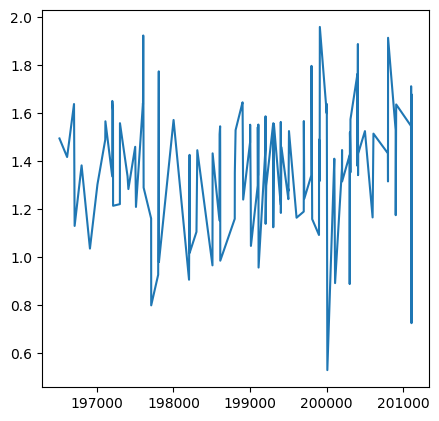

In [48]:
plt.plot(naop_avg.nao_yymmo,naop_avg.pint_pcp_ssurg)
result = mk.original_test(naop_avg.pint_pcp_ssurg)
print(result) #pint_twl_pcp	pint_twl_sflow	pint_twl_ssurge	pint_pcp_ssurg

# 1)TWL and pcp (intensity) - negative phase - correlation

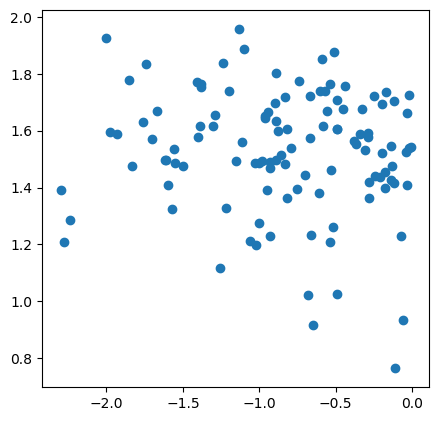

Kendall correlation coefficient: -0.062
Samples are uncorrelated (fail to reject H0) p=0.330


In [50]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_twl_pcp)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_twl_pcp)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 2) TWL and streamflow (intensity) - negative phase - correlation

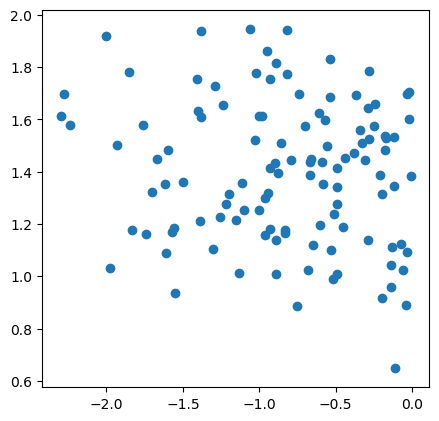

Kendall correlation coefficient: -0.067
Samples are uncorrelated (fail to reject H0) p=0.288


In [51]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_twl_sflow)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_twl_sflow)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 3) sflow and skewsurge (intensity) - negative phase - correlation

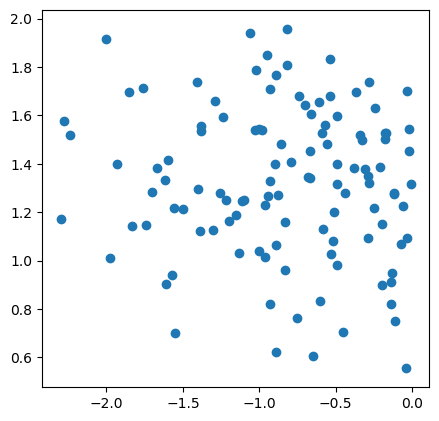

Kendall correlation coefficient: -0.054
Samples are uncorrelated (fail to reject H0) p=0.397


In [68]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_sflow_ssurge)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_sflow_ssurge)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 4) pcp and skewsurge (intensity) - negative phase - correlation

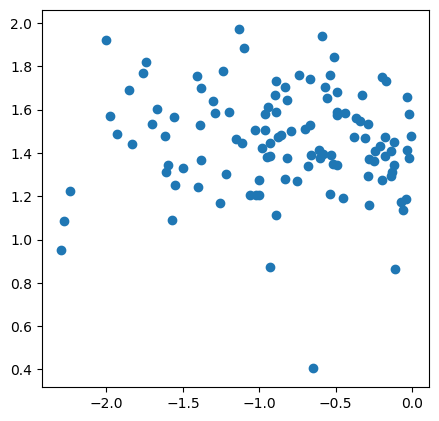

Kendall correlation coefficient: -0.070
Samples are uncorrelated (fail to reject H0) p=0.269


In [53]:
plt.scatter(naon_avg.nao_index,naon_avg.nint_pcp_ssurg)
plt.show()
coef, p = kendalltau(naon_avg.nao_index,naon_avg.nint_pcp_ssurg)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 1)TWL and pcp (intensity) - positive phase- correlation

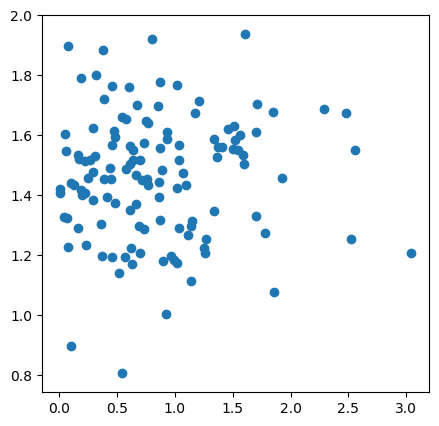

Kendall correlation coefficient: 0.043
Samples are uncorrelated (fail to reject H0) p=0.479


In [54]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_twl_pcp)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_twl_pcp)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 2)TWL and streamflow (intensity)- positive phase- correlation

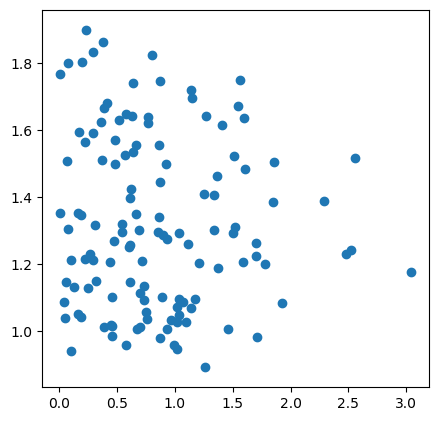

Kendall correlation coefficient: -0.051
Samples are uncorrelated (fail to reject H0) p=0.397


In [55]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_twl_sflow)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_twl_sflow)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 3) sflow and skewsurge (intensity) - positive phase- correlation

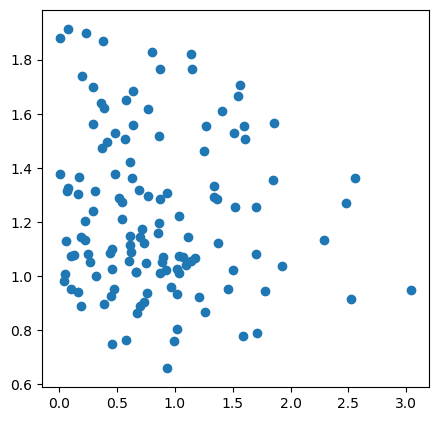

Kendall correlation coefficient: -0.062
Samples are uncorrelated (fail to reject H0) p=0.303


In [71]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_sflow_ssurge)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_sflow_ssurge)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

# 4) pcp and skewsurge (intensity) - positive phase- correlation

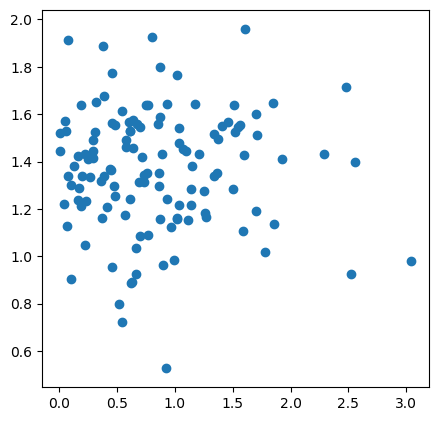

Kendall correlation coefficient: 0.018
Samples are uncorrelated (fail to reject H0) p=0.770


In [57]:
plt.scatter(naop_avg.nao_index,naop_avg.pint_pcp_ssurg)
plt.show()
coef, p = kendalltau(naop_avg.nao_index,naop_avg.pint_pcp_ssurg)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)  # null hypothesis H0 states that there is no effect or relationship between the variables.

In [75]:
naon_avg.to_csv('naon_avg.csv')
naop_avg.to_csv('naop_avg.csv')

In [78]:
n_jan_mar = naon[naon['mo'] < 4]
n_apr_jun = naon[(naon['mo'] >= 4) & (naon['mo'] < 7)]
n_jul_sep = naon[(naon['mo'] >= 7) & (naon['mo'] < 10)]
n_oct_dec = naon[(naon['mo'] >= 10) & (naon['mo'] <= 12)]
n_oct_dec

,Unnamed: 0,Unnamed: 0.1,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,nint_twl_pcp,nint_twl_sflow,nint_twl_ssurge,nint_pcp_ssurg
12,20,1068,1069,12-05-1967,1967,12,5,1.460,12.80,34.0,...,0.321051,196712,-0.45,1.690,1.24,1.677929,1.677929,1.188576,1.126801,1.193230
17,29,1392,1393,10/24/1968,1968,10,24,1.620,0.51,74.5,...,0.500574,196810,-2.30,1.770,6.23,1.390284,1.390284,1.612074,1.439628,0.951804
18,30,1421,1422,11/22/1968,1968,11,22,1.790,0.52,23.7,...,0.832590,196811,-0.93,1.890,6.23,1.444218,1.444218,1.247099,1.818692,1.290705
19,31,1423,1424,11/24/1968,1968,11,24,1.540,0.00,23.4,...,0.427069,196811,-0.93,1.790,20.20,1.124506,1.124506,1.144970,1.314994,0.663649
20,32,1423,1424,11/24/1968,1968,11,24,1.540,0.00,23.4,...,0.427069,196811,-0.93,1.690,20.20,1.124506,1.124506,1.144970,1.314994,0.663649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,739,15322,15323,12/22/2010,2010,12,22,1.867,26.30,123.0,...,0.940329,201012,-1.85,1.867,35.60,1.949382,1.949382,1.804093,1.933125,1.896914
409,740,15323,15324,12/23/2010,2010,12,23,1.844,4.82,133.0,...,0.945429,201012,-1.85,1.844,26.30,1.718858,1.718858,1.820987,1.936504,1.673212
410,741,15325,15326,12/25/2010,2010,12,25,1.903,10.70,188.0,...,0.977560,201012,-1.85,2.006,20.10,1.841387,1.841387,1.889201,1.973033,1.823473
411,742,15325,15326,12/25/2010,2010,12,25,1.903,10.70,188.0,...,0.977560,201012,-1.85,1.903,20.10,1.841387,1.841387,1.889201,1.973033,1.823473


In [82]:
p_jan_mar = naop[naop['mo'] < 4]
p_apr_jun = naop[(naop['mo'] >= 4) & (naop['mo'] < 7)]
p_jul_sep = naop[(naop['mo'] >= 7) & (naop['mo'] < 10)]
p_oct_dec = naop[(naop['mo'] >= 10) & (naop['mo'] <= 12)]
p_oct_dec

,Unnamed: 0,Unnamed: 0.1,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_twl_ssurge,pint_pcp_ssurg
0,3,346,347,12/13/1965,1965,12,13,1.540,2.76,32.3,...,0.829275,196512,1.37,1.670,11.90,1.534362,1.534362,1.252582,1.717200,1.475711
1,4,360,361,12/27/1965,1965,12,27,1.660,2.41,17.4,...,0.881295,196512,1.37,1.660,5.19,1.587212,1.587212,1.124952,1.836032,1.513770
2,12,714,715,12/16/1966,1966,12,16,1.510,1.73,30.6,...,0.827744,196612,0.72,1.660,43.80,1.451294,1.451294,1.208785,1.689468,1.417315
5,17,1007,1008,10-05-1967,1967,10,5,1.830,0.30,58.9,...,0.887543,196710,0.07,1.740,9.97,1.387989,1.387989,1.578988,1.877598,1.285477
6,18,1007,1008,10-05-1967,1967,10,5,1.830,0.30,58.9,...,0.887543,196710,0.07,1.830,9.97,1.387989,1.387989,1.578988,1.877598,1.285477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,778,15630,15631,10/31/2011,2011,10,31,1.715,22.70,60.2,...,0.979026,201110,0.39,1.715,33.70,1.913171,1.913171,1.567831,1.949445,1.921777
358,779,15649,15650,11/25/2011,2011,11,25,1.598,0.35,55.2,...,0.631837,201111,1.36,1.682,50.10,1.347380,1.347380,1.487824,1.554571,1.056483
359,780,15653,15654,11/29/2011,2011,11,29,1.676,2.99,45.7,...,0.838391,201111,1.36,1.670,6.26,1.618896,1.618896,1.451230,1.797144,1.498534
360,781,15653,15654,11/29/2011,2011,11,29,1.676,2.99,45.7,...,0.838391,201111,1.36,1.676,6.26,1.618896,1.618896,1.451230,1.797144,1.498534


In [83]:
p_apr_jun 

,Unnamed: 0,Unnamed: 0.1,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_twl_ssurge,pint_pcp_ssurg
51,109,4168,4169,6/13/1976,1976,6,13,1.740,22.90,145.0,...,0.980620,197606,0.80,1.740,53.50,1.921331,1.921331,1.824429,1.958052,1.924519
65,163,6131,6132,04-11-1982,1982,4,11,1.360,0.00,25.4,...,0.668622,198204,0.10,1.790,18.90,0.896404,0.896404,0.941859,1.328446,0.905202
138,307,8628,8629,4/15/1991,1991,4,15,1.680,0.35,23.0,...,0.990182,199104,0.29,1.790,18.60,1.386077,1.386077,1.212737,1.951613,1.414829
139,308,8628,8629,4/15/1991,1991,4,15,1.680,0.35,23.0,...,0.990182,199104,0.29,1.680,18.60,1.386077,1.386077,1.212737,1.951613,1.414829
140,309,8658,8659,5/15/1991,1991,5,15,1.480,0.30,342.0,...,0.942496,199105,0.08,1.780,5.79,1.227400,1.227400,1.800395,1.771962,1.340431
156,337,8987,8988,04-08-1992,1992,4,8,1.490,0.00,72.0,...,0.901823,199204,1.86,1.710,26.50,1.078031,1.078031,1.504080,1.743274,1.138404
161,342,9351,9352,04-07-1993,1993,4,7,1.680,0.00,11.5,...,0.887543,199304,0.97,1.680,0.51,1.198011,1.198011,1.033788,1.848974,1.124123
183,367,9738,9739,4/29/1994,1994,4,29,1.530,0.00,141.0,...,0.978707,199404,1.14,1.680,4.42,1.115390,1.115390,1.720579,1.857516,1.215288
282,587,12957,12958,05-04-2003,2003,5,4,1.442,3.91,201.0,...,0.993370,200305,0.01,1.691,29.30,1.479026,1.479026,1.687428,1.776106,1.689660
283,588,12972,12973,5/19/2003,2003,5,19,1.596,0.34,235.0,...,0.934464,200305,0.01,1.672,0.34,1.338901,1.338901,1.849611,1.856942,1.350886


In [84]:
p_jul_sep

,Unnamed: 0,Unnamed: 0.1,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_twl_ssurge,pint_pcp_ssurg
13,45,2057,2058,8/20/1970,1970,8,20,1.430,3.32,40.20,...,0.627566,197008,0.10,1.740,64.80,1.442688,1.442688,1.212546,1.394874,1.302945
14,46,2057,2058,8/20/1970,1970,8,20,1.430,3.32,40.20,...,0.627566,197008,0.10,1.690,64.80,1.442688,1.442688,1.212546,1.394874,1.302945
55,120,4594,4595,9/17/1977,1977,9,17,1.680,0.00,53.00,...,0.924264,197709,0.37,1.680,0.00,1.198011,1.198011,1.510455,1.885694,1.160844
59,128,4915,4916,09-05-1978,1978,9,5,1.770,6.97,8.89,...,0.991840,197809,0.46,1.770,43.90,1.766033,1.766033,1.015045,1.974882,1.774831
141,312,8775,8776,09-09-1991,1991,9,9,1.660,2.58,63.50,...,0.912278,199109,0.48,1.660,30.50,1.595308,1.595308,1.571720,1.867015,1.552850
199,383,10236,10237,09-11-1995,1995,9,11,1.930,2.99,22.70,...,0.999426,199509,0.31,1.930,60.00,1.656700,1.656700,1.243274,1.995984,1.659569
200,384,10254,10255,9/29/1995,1995,9,29,1.790,0.34,36.30,...,0.975201,199509,0.31,1.790,2.58,1.402525,1.402525,1.392771,1.961303,1.391623
201,407,10590,10591,8/30/1996,1996,8,30,1.620,0.00,5.58,...,0.927387,199608,1.02,1.730,45.40,1.175634,1.175634,0.946322,1.866441,1.163968
212,443,10958,10959,9/17/1997,1997,9,17,1.660,0.30,26.90,...,0.845595,199709,0.61,1.660,1.46,1.352671,1.352671,1.256343,1.800332,1.243529
229,490,11695,11696,9/24/1999,1999,9,24,1.654,0.00,72.20,...,0.977942,199909,0.36,1.727,10.20,1.187556,1.187556,1.615071,1.928918,1.214523


In [85]:
p_jan_mar

,Unnamed: 0,Unnamed: 0.1,sno,day,yy,mo,dd,total_wl,precipitation,streamflow,...,emp_skewv,nao_yymmo,nao_index,twl_max,prec_max,intensity,pint_twl_pcp,pint_twl_sflow,pint_twl_ssurge,pint_pcp_ssurg
3,15,764,765,02-04-1967,1967,2,4,1.660,15.40,14.9,...,0.924264,196702,0.19,1.660,49.40,1.851970,1.851970,1.082876,1.879000,1.821497
4,16,785,786,2/25/1967,1967,2,25,1.590,8.30,12.1,...,0.646309,196702,0.19,1.750,13.10,1.730970,1.730970,1.003953,1.568150,1.455438
8,21,1099,1100,01-05-1968,1968,1,5,1.670,13.80,27.6,...,0.935611,196801,0.13,1.730,9.54,1.839411,1.839411,1.269476,1.893536,1.817098
9,22,1100,1101,01-06-1968,1968,1,6,1.420,2.60,25.2,...,0.695397,196801,0.13,1.670,13.80,1.397998,1.397998,1.034107,1.449127,1.339666
10,23,1112,1113,1/18/1968,1968,1,18,1.600,0.21,16.3,...,0.824684,196801,0.13,1.790,11.90,1.231544,1.231544,1.079625,1.752709,1.128203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,766,15413,15414,3/24/2011,2011,3,24,1.678,0.69,40.2,...,0.972587,201103,0.61,1.709,27.10,1.443835,1.443835,1.404310,1.931659,1.457351
346,767,15413,15414,3/24/2011,2011,3,24,1.678,0.69,40.2,...,0.972587,201103,0.61,1.913,27.10,1.443835,1.443835,1.404310,1.931659,1.457351
347,768,15415,15416,3/26/2011,2011,3,26,1.667,3.81,34.3,...,0.991457,201103,0.61,1.678,37.60,1.650835,1.650835,1.341451,1.947150,1.686600
348,769,15415,15416,3/26/2011,2011,3,26,1.667,3.81,34.3,...,0.991457,201103,0.61,1.651,37.60,1.650835,1.650835,1.341451,1.947150,1.686600
